In [90]:
import pandas as pd
import numpy as np

In [91]:
data_delhi = pd.read_csv("Indian_housing_Delhi_data.csv")

In [92]:
data_delhi.head

<bound method NDFrame.head of                     house_type   house_size            location   city  \
0       1 RK Studio Apartment     400 sq ft             Kalkaji  Delhi   
1       1 RK Studio Apartment     400 sq ft   Mansarover Garden  Delhi   
2     2 BHK Independent Floor     500 sq ft         Uttam Nagar  Delhi   
3     3 BHK Independent House   1,020 sq ft          Model Town  Delhi   
4             2 BHK Apartment     810 sq ft    Sector 13 Rohini  Delhi   
...                        ...          ...                 ...    ...   
4995              4 BHK Villa   5,896 sq ft        Sunder Nagar  Delhi   
4996  5 BHK Independent House   6,521 sq ft        Sunder Nagar  Delhi   
4997  3 BHK Independent Floor   1,855 sq ft  New Friends Colony  Delhi   
4998  3 BHK Independent Floor   2,856 sq ft  New Friends Colony  Delhi   
4999  3 BHK Independent Floor   2,856 sq ft  New Friends Colony  Delhi   

       latitude  longitude    price currency  numBathrooms  numBalconies  \
0    

In [93]:
data_delhi.shape

(5000, 16)

In [94]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [95]:
data_delhi.isnull().sum()

house_type             0
house_size             0
location               0
city                   0
latitude               0
longitude              0
price                  0
currency               0
numBathrooms          25
numBalconies        2263
isNegotiable        4821
priceSqFt           5000
verificationDate       0
description          285
SecurityDeposit        0
Status                 0
dtype: int64

In [96]:
data_delhi.drop(['location', 'city','currency','priceSqFt', 'description', 'SecurityDeposit', 'isNegotiable', 'numBalconies'], axis=1, inplace=True)

In [97]:
data_delhi['house_size_SF'] = data_delhi['house_size'].str.split(' ', expand=True)[0]
data_delhi['house_size_SF'] = data_delhi['house_size_SF'].str.replace(',', '')

In [98]:
data_delhi['house_type'].unique()

array(['1 RK Studio Apartment ', '2 BHK Independent Floor ',
       '3 BHK Independent House ', '2 BHK Apartment ', '3 BHK Apartment ',
       '3 BHK Independent Floor ', '4 BHK Independent Floor ',
       '1 BHK Independent Floor ', '1 BHK Apartment ',
       '8 BHK Independent Floor ', '4 BHK Apartment ',
       '6 BHK Independent Floor ', '2 BHK Independent House ',
       '1 BHK Independent House ', '5 BHK Independent Floor ',
       '4 BHK Independent House ', '5 BHK Villa ',
       '5 BHK Independent House ', '7 BHK Independent Floor ',
       '8 BHK Independent House ', '10 BHK Independent House ',
       '7 BHK Independent House ', '9 BHK Independent House ',
       '8 BHK Villa ', '4 BHK Villa ', '5 BHK Apartment ',
       '6 BHK penthouse ', '12 BHK Independent House '], dtype=object)

In [99]:
data_delhi['n_beds'] = data_delhi['house_type'].str.split(' ', expand=True)[0]
data_delhi['BHK_RK'] = data_delhi['house_type'].str.split(' ', expand=True)[1]
data_delhi['building_type'] = data_delhi['house_type'].apply(lambda x: x.split(' ')[2] + x.split(" ")[3])

In [100]:
data_delhi.drop(['house_type', 'house_size', 'latitude', 'longitude', 'verificationDate'], axis=1, inplace=True)

In [101]:
data_delhi['numBathrooms'] = data_delhi['numBathrooms'].fillna(data_delhi['n_beds'])

In [102]:
data_delhi.dtypes

price             int64
numBathrooms     object
Status           object
house_size_SF    object
n_beds           object
BHK_RK           object
building_type    object
dtype: object

In [103]:
num_cols = ['numBathrooms', 'house_size_SF', 'n_beds']
data_delhi[num_cols] = data_delhi[num_cols].astype('int64')

In [104]:
data_delhi.to_csv("final_delhi_dataset.csv")

In [105]:
cat_cols = data_delhi.select_dtypes(include = 'object').columns.tolist()

# Random Forest

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
X = data_delhi.copy()
y = X.pop('price')

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

In [109]:
le = LabelEncoder()

# for col in cat_cols:
    # X_train[col] = le.fit_transform(X_train[col])
    # X_test[col] = le.transform(X_test[col])
    
    
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    le_dict[col] = le

In [110]:
model = RandomForestRegressor()

In [111]:
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [112]:
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print(f"Mean absolute error is {mae}")
print(f"Root mean squared error is {rmse}")
print(f"Mean r squared score is {r2}")

Mean absolute error is 73259.32969194981
Root mean squared error is 173966.47302980756
Mean r squared score is 0.6109626161755637


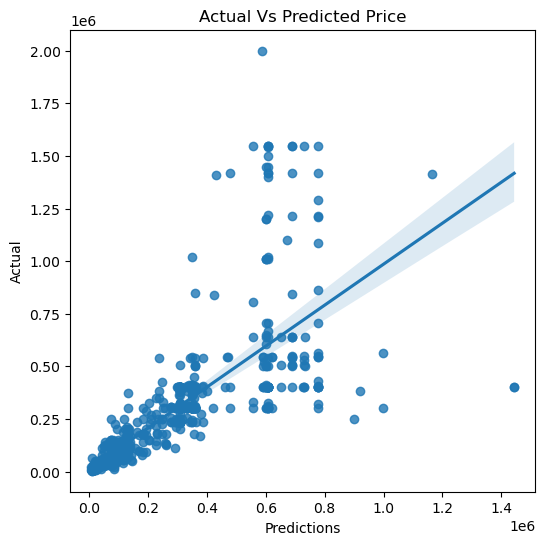

In [113]:
plt.figure(figsize=[6,6])

sns.regplot(x=pred, y=y_test)

plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Actual Vs Predicted Price')

plt.show()

In [114]:
print(model)

RandomForestRegressor()


In [115]:
print(le_dict)

{'Status': LabelEncoder(), 'BHK_RK': LabelEncoder(), 'building_type': LabelEncoder()}


In [116]:
# with open('model.pkl', 'wb') as f:
    # pickle.dump(model, f)

In [117]:
import joblib

In [118]:
# Save the model
joblib.dump(model, 'model.pkl')
for col, le in le_dict.items():
    col_safe = col.replace("/", "_")
    joblib.dump(le, f'le_{col_safe}.pkl')

In [119]:
print(X_train)


      numBathrooms  Status  house_size_SF  n_beds  BHK_RK  building_type
2729             3       2           2856       3       0              1
3923             1       1            500       1       0              0
320              3       1           1700       3       0              0
4078             2       1            930       2       0              0
1786             2       1            540       2       0              1
...            ...     ...            ...     ...     ...            ...
153              2       1            990       3       0              1
866              3       1           1440       3       0              1
2790             4       2           5896       4       0              1
74               3       1           1800       3       0              1
338              2       1            800       2       0              1

[4000 rows x 6 columns]
